In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
os.chdir('/home/mpg01/MBPC/fatma.chafra01/ColabDesign/af/examples')
os.getcwd()

'/home/mpg01/MBPC/fatma.chafra01/ColabDesign/af/examples'

In [4]:
def read_cdr_gen_out_df(filename='file.out'):
    data = []
    stage = 0  # 0: before Stage 1, 1: Stage 1, 2: semigreedy optimization
    
    with open(filename, 'r') as file:
        for line in file:
            if 'Stage 1: running (logits → soft)' in line:
                stage = 1
                continue
            elif 'Running semigreedy optimization...' in line:
                stage = 2
                continue
            elif line.startswith('end'):
                break
            
            if stage > 0:
                # Parse the line
                print(line)
                parts = line.split()
                if len(parts) < 3 or not parts[0].isdigit():
                    continue
                
                iteration = int(parts[0])
                print(iteration)
                print(parts[1])
                print(parts[2])
                model = parts[2].strip('[').strip(']')
                #model = int(re.findall(r'\d+', parts[1])[0])
                
                row = {'stage':stage, 'iteration': iteration, 'model': model}
                print(row)
                print('range', range(4, len(parts), 2))
                
                for i in range(4, len(parts), 2):
                    key = parts[i-1]
                    print('key', key)
                    value = float(parts[i])
                    print('value', value)
                    row[key] = value
                
                data.append(row)
    
    df = pd.DataFrame(data)
    return df


In [4]:
test = read_cdr_gen_out_df('cdr_gen_c38_50_500_weights_test_9.out')

1 models [0] recycles 0 hard 0 soft 0.02 temp 1 seqid 0.47 loss 6035.70 seq_ent 0.70 pae 0.79 i_pae 0.83 exp_res 0.49 con 4.60 i_con 4.73 dgram_cce 496.94 fape 230.40 plddt 0.31 ptm 0.50 i_ptm 0.11 rmsd 50.69

1
models
[0]
{'stage': 1, 'iteration': 1, 'model': '0'}
range range(4, 39, 2)
key recycles
value 0.0
key hard
value 0.0
key soft
value 0.02
key temp
value 1.0
key seqid
value 0.47
key loss
value 6035.7
key seq_ent
value 0.7
key pae
value 0.79
key i_pae
value 0.83
key exp_res
value 0.49
key con
value 4.6
key i_con
value 4.73
key dgram_cce
value 496.94
key fape
value 230.4
key plddt
value 0.31
key ptm
value 0.5
key i_ptm
value 0.11
key rmsd
value 50.69
2 models [0] recycles 0 hard 0 soft 0.04 temp 1 seqid 0.77 loss 5857.91 seq_ent 0.70 pae 0.80 i_pae 0.84 exp_res 0.52 con 4.55 i_con 4.71 dgram_cce 487.13 fape 228.70 plddt 0.28 ptm 0.49 i_ptm 0.11 rmsd 46.70

2
models
[0]
{'stage': 1, 'iteration': 2, 'model': '0'}
range range(4, 39, 2)
key recycles
value 0.0
key hard
value 0.0
key s

In [5]:
print(test)

     stage  iteration model  recycles  hard  soft  temp  seqid     loss  \
0        1          1     0       0.0   0.0  0.02   1.0   0.47  6035.70   
1        1          2     0       0.0   0.0  0.04   1.0   0.77  5857.91   
2        1          3     0       0.0   0.0  0.06   1.0   0.80  5962.67   
3        1          4     0       0.0   0.0  0.08   1.0   0.79  5952.06   
4        1          5     0       0.0   0.0  0.10   1.0   0.79  5912.92   
..     ...        ...   ...       ...   ...   ...   ...    ...      ...   
545      2        546     0       0.0   1.0  0.00   1.0   0.77  3806.12   
546      2        547     0       0.0   1.0  0.00   1.0   0.77  3806.12   
547      2        548     0       0.0   1.0  0.00   1.0   0.77  3806.12   
548      2        549     0       0.0   1.0  0.00   1.0   0.77  3806.12   
549      2        550     0       0.0   1.0  0.00   1.0   0.77  3806.12   

     seq_ent  ...  i_pae  exp_res   con  i_con  dgram_cce    fape  plddt  \
0       0.70  ...   0.8

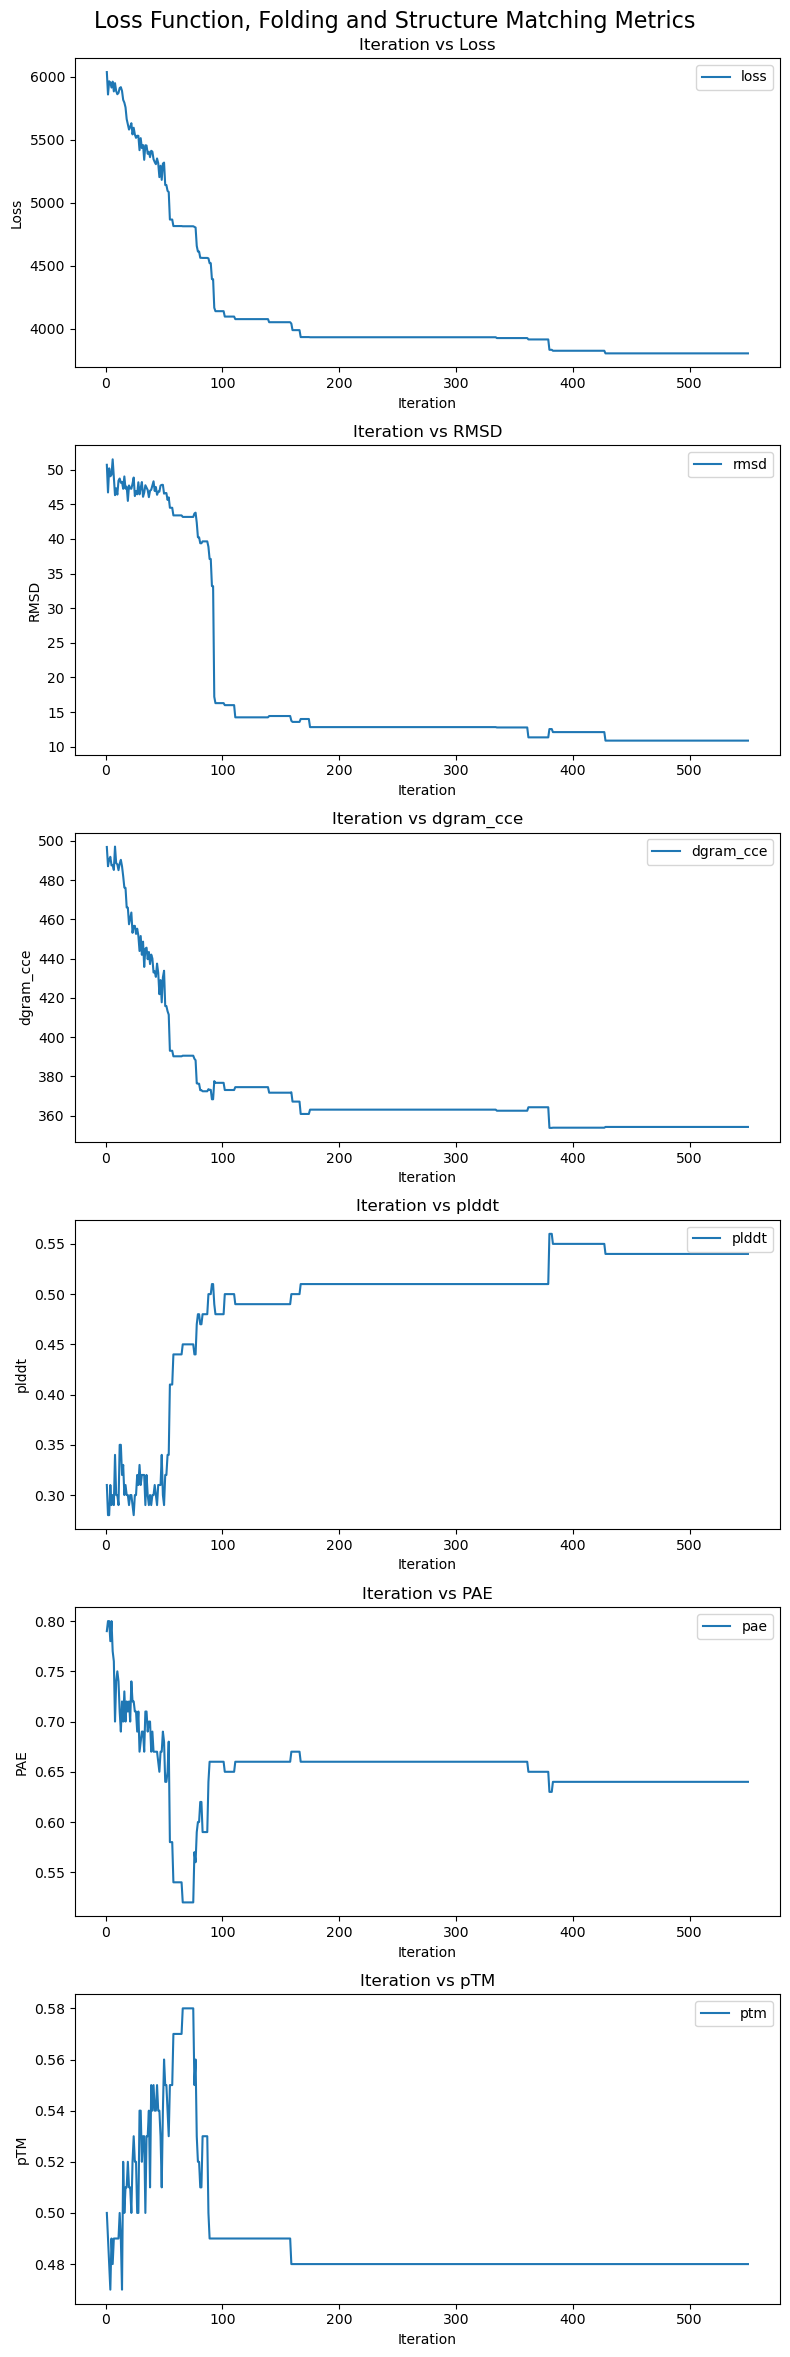

In [19]:
# structure and folding losses
# Create a figure with two subplots
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(8, 24))

# Plot iteration vs loss
test.plot(x='iteration', y='loss', ax=ax1, kind='line')
ax1.set_title('Iteration vs Loss')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')

# Plot iteration vs RMSD
test.plot(x='iteration', y='rmsd', ax=ax2, kind='line')
ax2.set_title('Iteration vs RMSD')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('RMSD')

# Plot iteration vs dgram_cce
test.plot(x='iteration', y='dgram_cce', ax=ax3, kind='line')
ax3.set_title('Iteration vs dgram_cce')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('dgram_cce')

# Plot iteration vs plddt
test.plot(x='iteration', y='plddt', ax=ax4, kind='line')
ax4.set_title('Iteration vs plddt')
ax4.set_xlabel('Iteration')
ax4.set_ylabel('plddt')

# Plot iteration vs pae
test.plot(x='iteration', y='pae', ax=ax5, kind='line')
ax5.set_title('Iteration vs PAE')
ax5.set_xlabel('Iteration')
ax5.set_ylabel('PAE')

# Plot iteration vs pTM
test.plot(x='iteration', y='ptm', ax=ax6, kind='line')
ax6.set_title('Iteration vs pTM')
ax6.set_xlabel('Iteration')
ax6.set_ylabel('pTM')

#fig.subplots_adjust(top=0.99)
# Add an overall title to the figure
fig.suptitle('Loss Function, Folding and Structure Matching Metrics', fontsize=16)



# Adjust layout and display the plot
plt.tight_layout()
# Adjust the layout to make room for the overall title
fig.subplots_adjust(top=0.96)
plt.show()

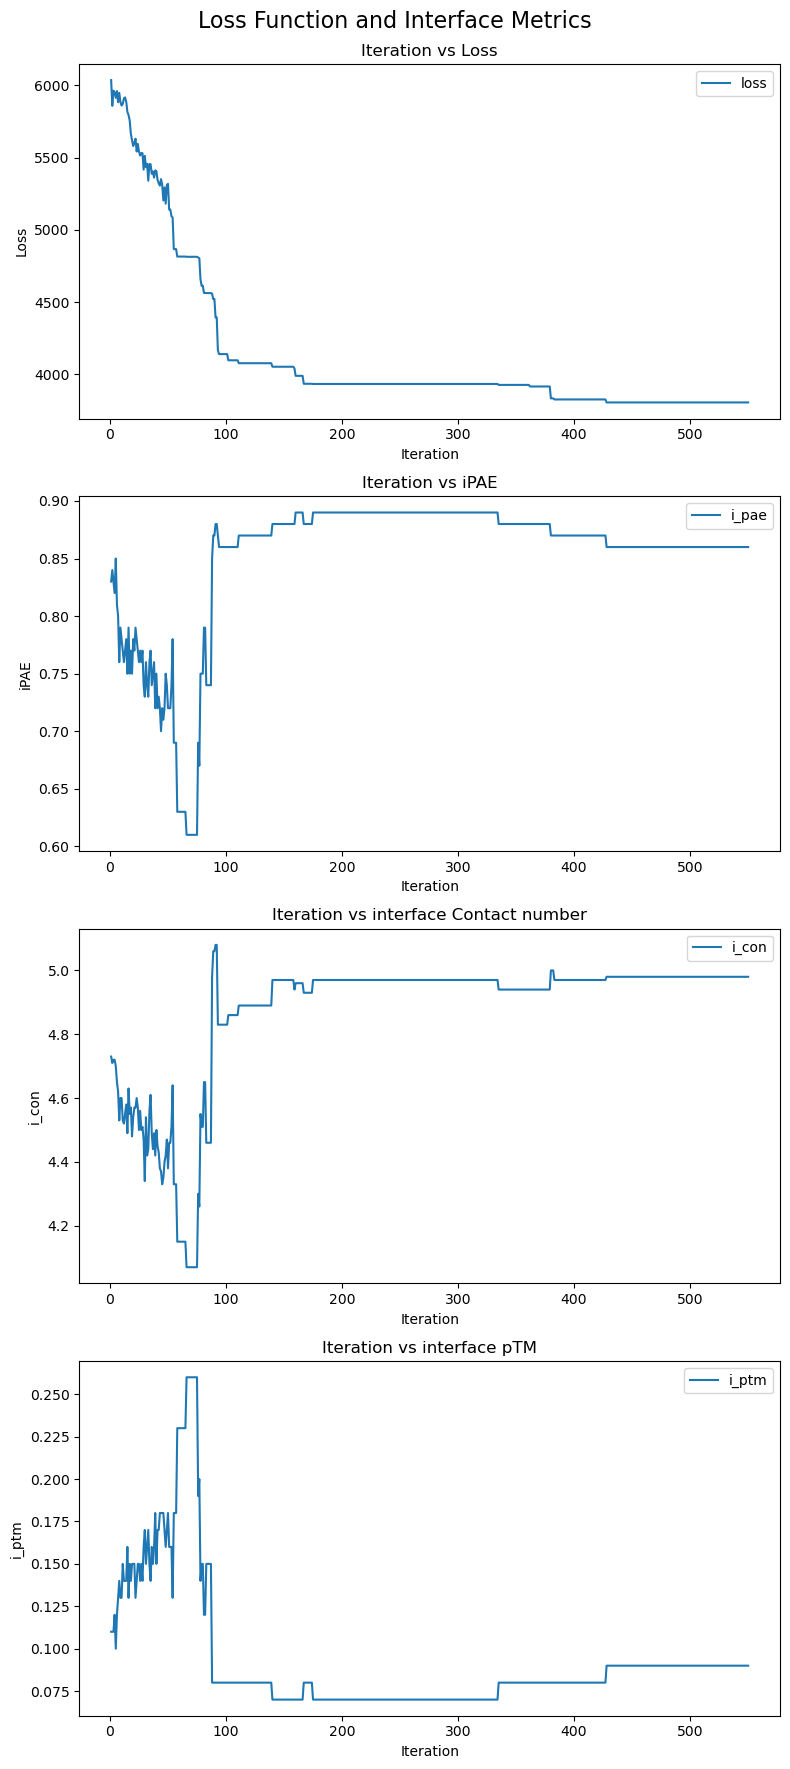

In [23]:
# interface losses
# Create a figure with two subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 18))

# Plot iteration vs loss
test.plot(x='iteration', y='loss', ax=ax1, kind='line')
ax1.set_title('Iteration vs Loss')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')

# Plot iteration vs i_pae
test.plot(x='iteration', y='i_pae', ax=ax2, kind='line')
ax2.set_title('Iteration vs iPAE')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('iPAE')

# Plot iteration vs i_con
test.plot(x='iteration', y='i_con', ax=ax3, kind='line')
ax3.set_title('Iteration vs interface Contact number')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('i_con')

# Plot iteration vs i_ptm
test.plot(x='iteration', y='i_ptm', ax=ax4, kind='line')
ax4.set_title('Iteration vs interface pTM')
ax4.set_xlabel('Iteration')
ax4.set_ylabel('i_ptm')

#fig.subplots_adjust(top=0.99)
# Add an overall title to the figure
fig.suptitle('Loss Function and Interface Metrics', fontsize=16)



# Adjust layout and display the plot
plt.tight_layout()
# Adjust the layout to make room for the overall title
fig.subplots_adjust(top=0.95)
plt.show()

In [5]:
gen0 = read_cdr_gen_out_df('cdr_gen_c38_50_500_weights_test_0.out')

1 models [0] recycles 0 hard 0 soft 0.02 temp 1 seqid 0.52 loss 6214.89 seq_ent 0.70 pae 0.82 i_pae 0.87 exp_res 0.56 con 4.64 i_con 4.81 dgram_cce 502.52 fape 230.42 plddt 0.31 ptm 0.47 i_ptm 0.10 rmsd 56.83

1
models
[0]
{'stage': 1, 'iteration': 1, 'model': '0'}
range range(4, 39, 2)
key recycles
value 0.0
key hard
value 0.0
key soft
value 0.02
key temp
value 1.0
key seqid
value 0.52
key loss
value 6214.89
key seq_ent
value 0.7
key pae
value 0.82
key i_pae
value 0.87
key exp_res
value 0.56
key con
value 4.64
key i_con
value 4.81
key dgram_cce
value 502.52
key fape
value 230.42
key plddt
value 0.31
key ptm
value 0.47
key i_ptm
value 0.1
key rmsd
value 56.83
2 models [0] recycles 0 hard 0 soft 0.04 temp 1 seqid 0.75 loss 5936.27 seq_ent 0.70 pae 0.80 i_pae 0.83 exp_res 0.51 con 4.50 i_con 4.62 dgram_cce 488.45 fape 229.77 plddt 0.26 ptm 0.47 i_ptm 0.11 rmsd 49.95

2
models
[0]
{'stage': 1, 'iteration': 2, 'model': '0'}
range range(4, 39, 2)
key recycles
value 0.0
key hard
value 0.0
ke

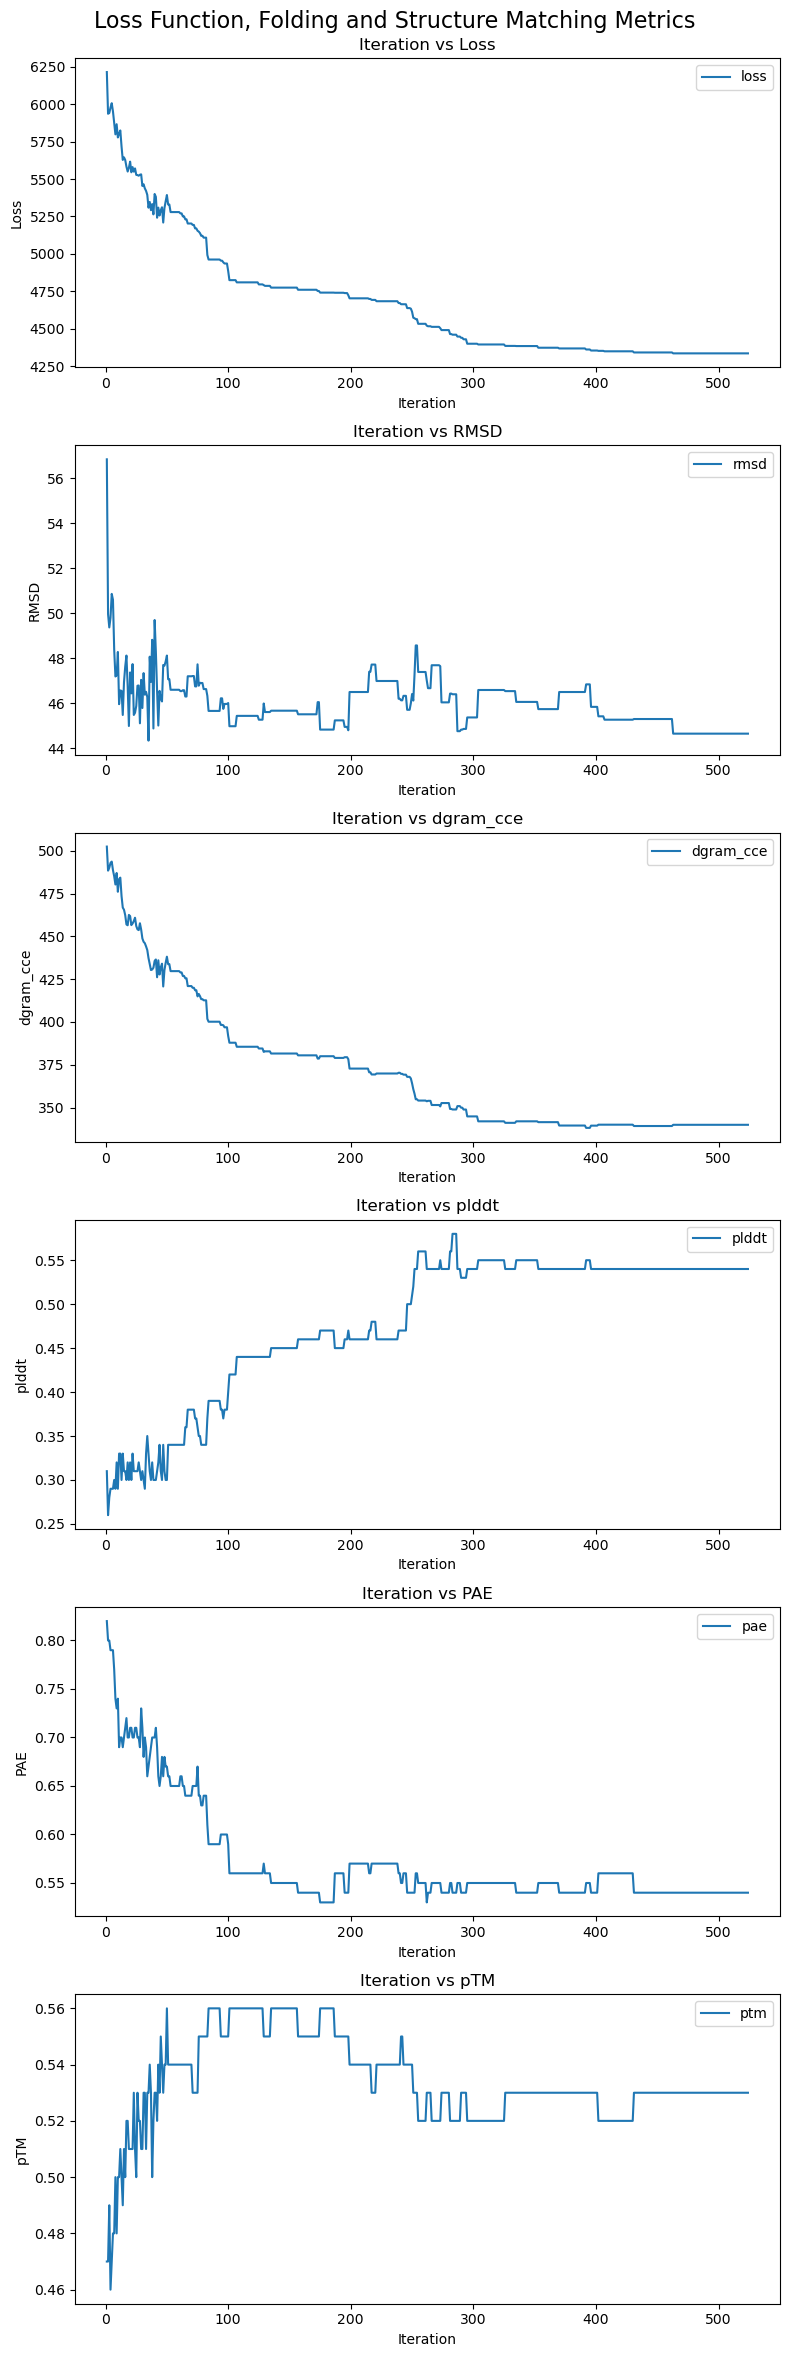

In [6]:
# structure and folding losses
# Create a figure with two subplots
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(8, 24))

# Plot iteration vs loss
gen0.plot(x='iteration', y='loss', ax=ax1, kind='line')
ax1.set_title('Iteration vs Loss')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')

# Plot iteration vs RMSD
gen0.plot(x='iteration', y='rmsd', ax=ax2, kind='line')
ax2.set_title('Iteration vs RMSD')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('RMSD')

# Plot iteration vs dgram_cce
gen0.plot(x='iteration', y='dgram_cce', ax=ax3, kind='line')
ax3.set_title('Iteration vs dgram_cce')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('dgram_cce')

# Plot iteration vs plddt
gen0.plot(x='iteration', y='plddt', ax=ax4, kind='line')
ax4.set_title('Iteration vs plddt')
ax4.set_xlabel('Iteration')
ax4.set_ylabel('plddt')

# Plot iteration vs pae
gen0.plot(x='iteration', y='pae', ax=ax5, kind='line')
ax5.set_title('Iteration vs PAE')
ax5.set_xlabel('Iteration')
ax5.set_ylabel('PAE')

# Plot iteration vs pTM
gen0.plot(x='iteration', y='ptm', ax=ax6, kind='line')
ax6.set_title('Iteration vs pTM')
ax6.set_xlabel('Iteration')
ax6.set_ylabel('pTM')

#fig.subplots_adjust(top=0.99)
# Add an overall title to the figure
fig.suptitle('Loss Function, Folding and Structure Matching Metrics', fontsize=16)



# Adjust layout and display the plot
plt.tight_layout()
# Adjust the layout to make room for the overall title
fig.subplots_adjust(top=0.96)
plt.show()